In [71]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm

In [72]:
file_path = "./ref/부산광역시방범용CCTV 정보20230622.csv"
CCTV = pd.read_csv(file_path, encoding="EUC-KR")
CCTV.sample(3)

,CCTV 명칭,CCTV 좌표,CCTV 그룹
2931,(7차)_모덕지역아동센터_모라로110번길37-4,"10.1.11.180:0:0:0:0:0:0,10.1.11.180:9400:",사상-7차
5537,(6차)부전2동_남선알미늄골목_신천대로102번길28,"10.1.11.47:0:0:0:0:0:0,10.1.11.47:9400:",진구-6차
4676,부산_14_260_영도여자고등학교_통학로,"10.1.10.129:0:0:0:0:0:0,10.1.10.129:9402:",영도-14차


In [73]:
cctv = CCTV.rename(columns={"CCTV 그룹":"local"})['local']

In [74]:
cctv = cctv.apply(lambda x : x.split("-")[0])
cctv = cctv.value_counts()
cctv = cctv.reset_index()
cctv.head()

,local,count
0,사하,431
1,사상,422
2,해운대,418
3,동래,404
4,금정,403


In [75]:
import pandas as pd
file_path2 = "./ref/연령별인구현황월간202306.xlsx"
ori = pd.read_excel(file_path2, sheet_name="연령별인구현황", skiprows=3)
ori.head(2)

,행정기관코드,행정기관,총 인구수,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,...,10~19세.2,20~29세.2,30~39세.2,40~49세.2,50~59세.2,60~69세.2,70~79세.2,80~89세.2,90~99세.2,100세 이상.2
0,2600000000,부산광역시,"3,306,993","3,306,993","200,627","264,771","386,558","393,792","489,807","539,964",...,"128,872","187,837","191,071","242,526","276,337","296,378","172,706","87,000","13,119",384
1,2611000000,부산광역시 중구,"39,311","39,311",931,"1,773","5,638","4,310","4,582","6,423",...,914,"2,964","2,037","2,096","3,078","4,109","2,877","1,532",251,15


In [76]:
data = ori[["행정기관", "총 인구수"]]
data.columns = ["local", "population"]
data = data.loc[1:]
data["local"] = data["local"].apply(lambda x: x.replace("부산광역시 ","").strip())
data = data.reset_index(drop=True)
data

,local,population
0,중구,"39,311"
1,서구,"104,449"
2,동구,"86,809"
3,영도구,"107,006"
4,부산진구,"357,475"
5,동래구,"272,590"
6,남구,"255,786"
7,북구,"276,684"
8,해운대구,"383,355"
9,사하구,"300,922"


In [77]:
data["local"] = data["local"].apply(lambda x: x.replace("구", "").replace("군","")
                                    .replace("부산진", "진구 ") if len(x.strip())>2 else x)
data

,local,population
0,중구,"39,311"
1,서구,"104,449"
2,동구,"86,809"
3,영도,"107,006"
4,진구,"357,475"
5,동래,"272,590"
6,남구,"255,786"
7,북구,"276,684"
8,해운대,"383,355"
9,사하,"300,922"


In [78]:
total = pd.merge(cctv, data, on="local")
total["population"] = total["population"].str.replace(",", "").astype(int)
total.sort_values(by="population", ascending=False)
total = total.set_index("local")
total

,count,population
local,,
사하,431,300922
사상,422,203029
해운대,418,383355
동래,404,272590
금정,403,218711
북구,403,276684
영도,381,107006
연제,377,202919
동구,374,86809


In [79]:
# 윈도우용 폰트 경로 설정
path = "C:\\Windows\\Fonts\\NanumGothicLight.otf"
font_name = fm.FontProperties(fname = path).get_name()
rc("font", family = font_name)

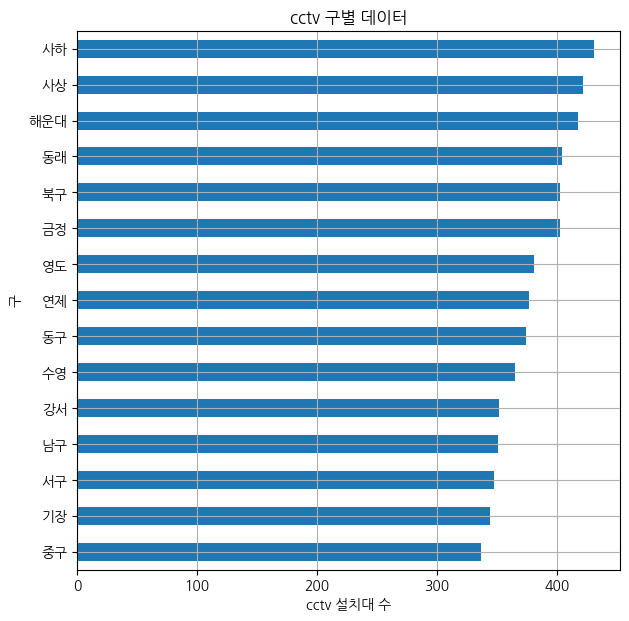

In [80]:
# plt.figure()
total["count"].sort_values().plot(kind="barh", grid=True, figsize=(7,7), ylabel="구")
plt.title("cctv 구별 데이터")
plt.xlabel("cctv 설치대 수")
plt.show()

[]

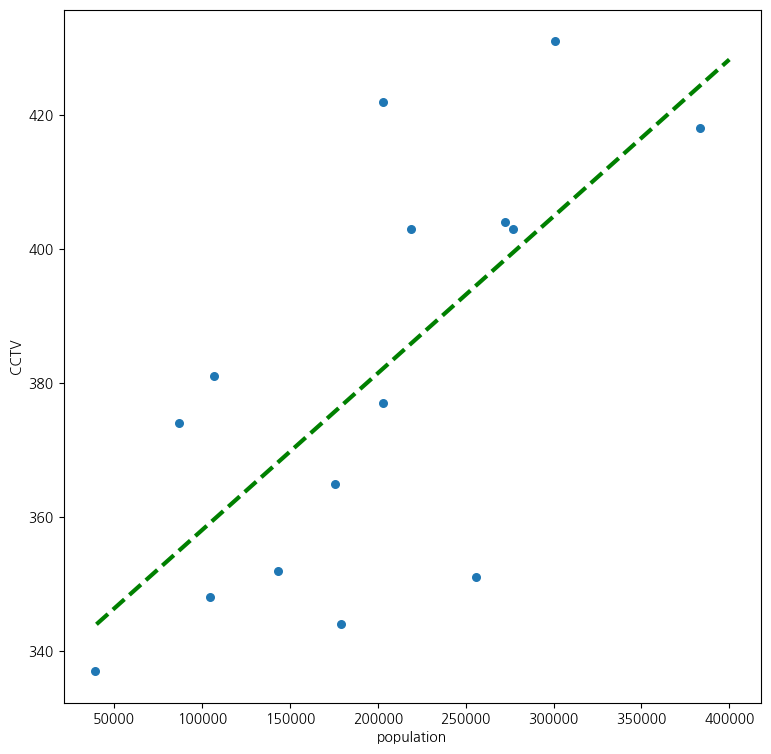

In [81]:
import numpy as np
fp1 = np.polyfit(total["population"], total["count"], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(40000, 400000, 10)
plt.figure(figsize=(9,9))
plt.plot(fx, f1(fx), ls="dashed", lw=3, color="g")
plt.scatter(total["population"], total["count"], s=30)
plt.xlabel("population")
plt.ylabel("CCTV")
plt.plot()

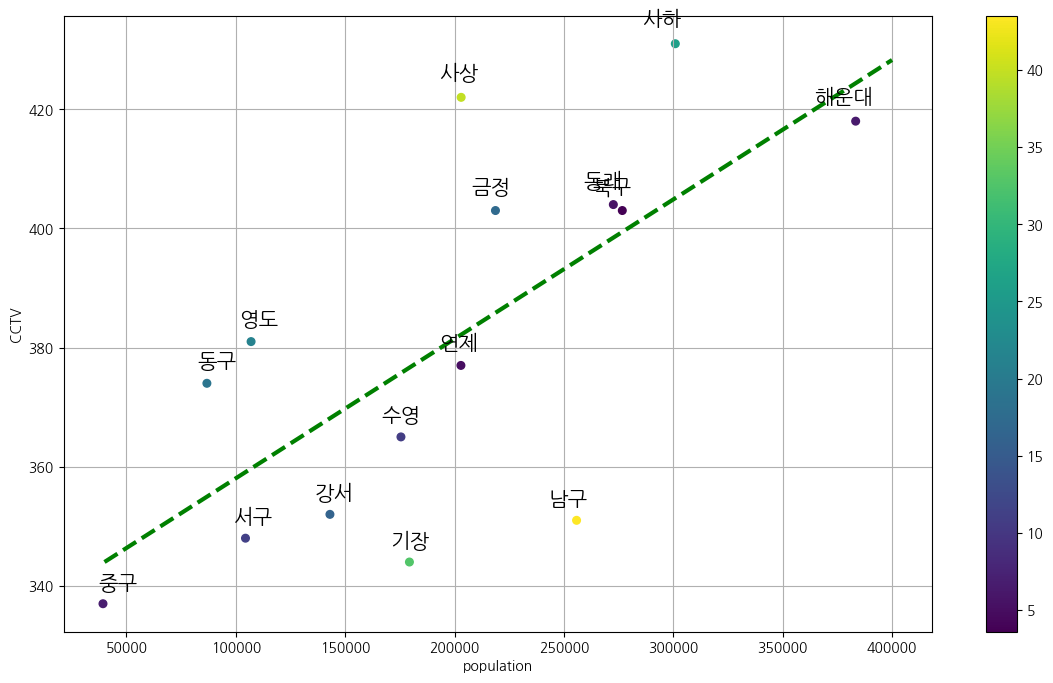

In [82]:
import numpy as np
fp1 = np.polyfit(total["population"], total["count"], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(40000, 400000, 10)
plt.figure(figsize=(14,8))
plt.plot(fx, f1(fx), ls="dashed", lw=3, color="g")

# 오차
total['err'] = np.abs(total['count'] - f1(total['population']))

plt.scatter(total["population"], total["count"], s=30, c=total["err"])
plt.xlabel("population")
plt.ylabel("CCTV")
plt.plot()

# 점마다 각 이름을 부여
for i in range(len(total["population"])):
    plt.text(total["population"].iloc[i]*0.95, total["count"].iloc[i]*1.007, total.index[i], fontsize=15)
plt.grid()
plt.colorbar()
plt.show()

사상은 인구 수에 비해 cctv가 많은 편이고 남구는 적은 편인 걸 볼 수 있다.